# Netflix Titles Analysis

This notebook analyzes the Netflix titles dataset, exploring content types, ratings, countries, and trends over time.

## 0. Install Required Packages

Run this cell first if you don't have the required packages installed.

In [8]:
# Install required packages (run this cell first if needed)
import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn --quiet


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\vishx\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## 1. Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 2. Load Data

In [10]:
# Load the Netflix dataset
df = pd.read_csv('netflix_titles.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

Dataset shape: (8807, 12)

Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


## 3. Data Overview

In [11]:
# First few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
# Data types and missing values
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   show_id       8807 non-null   str  
 1   type          8807 non-null   str  
 2   title         8807 non-null   str  
 3   director      6173 non-null   str  
 4   cast          7982 non-null   str  
 5   country       7976 non-null   str  
 6   date_added    8797 non-null   str  
 7   release_year  8807 non-null   int64
 8   rating        8803 non-null   str  
 9   duration      8804 non-null   str  
 10  listed_in     8807 non-null   str  
 11  description   8807 non-null   str  
dtypes: int64(1), str(11)
memory usage: 825.8 KB


In [13]:
# Statistical summary
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [14]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})

missing_df[missing_df['Missing Count'] > 0].sort_values('Percentage', ascending=False)

,Missing Count,Percentage
director,2634,29.908028
country,831,9.435676
cast,825,9.367549
date_added,10,0.113546
rating,4,0.045418
duration,3,0.034064


## 4. Content Type Analysis

In [15]:
# Distribution of content types
type_counts = df['type'].value_counts()
print(type_counts)
print(f"\nPercentage:")
print(df['type'].value_counts(normalize=True) * 100)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Percentage:
type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64


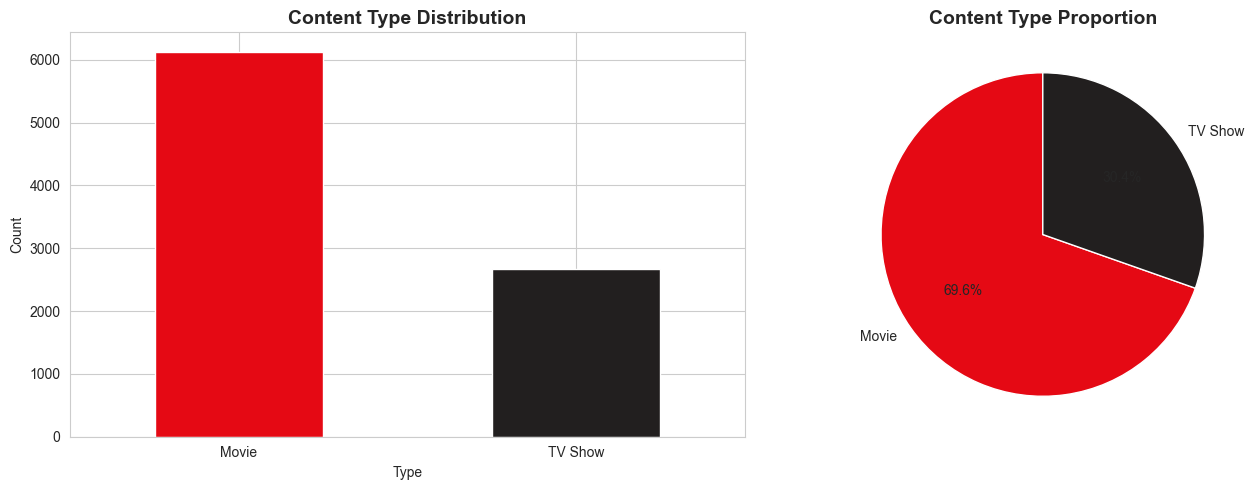

In [16]:
# Visualize content type distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
type_counts.plot(kind='bar', ax=ax1, color=['#E50914', '#221f1f'])
ax1.set_title('Content Type Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Type')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)

# Pie chart
colors = ['#E50914', '#221f1f']
ax2.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors)
ax2.set_title('Content Type Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Release Year Analysis

In [17]:
# Release year statistics
print(f"Oldest content: {df['release_year'].min()}")
print(f"Newest content: {df['release_year'].max()}")
print(f"Mean release year: {df['release_year'].mean():.0f}")
print(f"Median release year: {df['release_year'].median():.0f}")

Oldest content: 1925
Newest content: 2021
Mean release year: 2014
Median release year: 2017


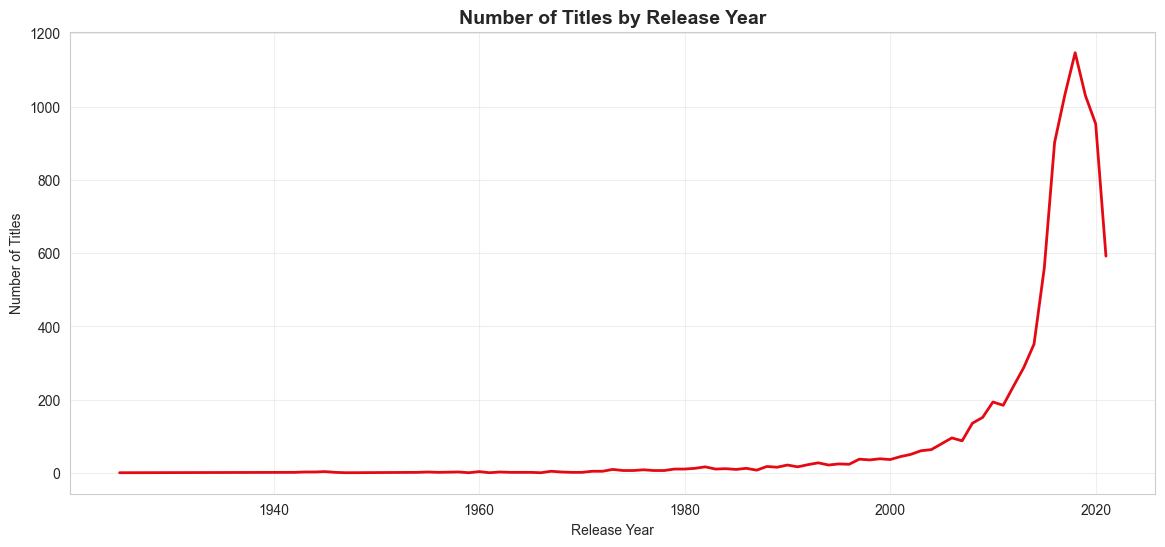

In [18]:
# Content added over years
plt.figure(figsize=(14, 6))
df['release_year'].value_counts().sort_index().plot(kind='line', linewidth=2, color='#E50914')
plt.title('Number of Titles by Release Year', fontsize=14, fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True, alpha=0.3)
plt.show()

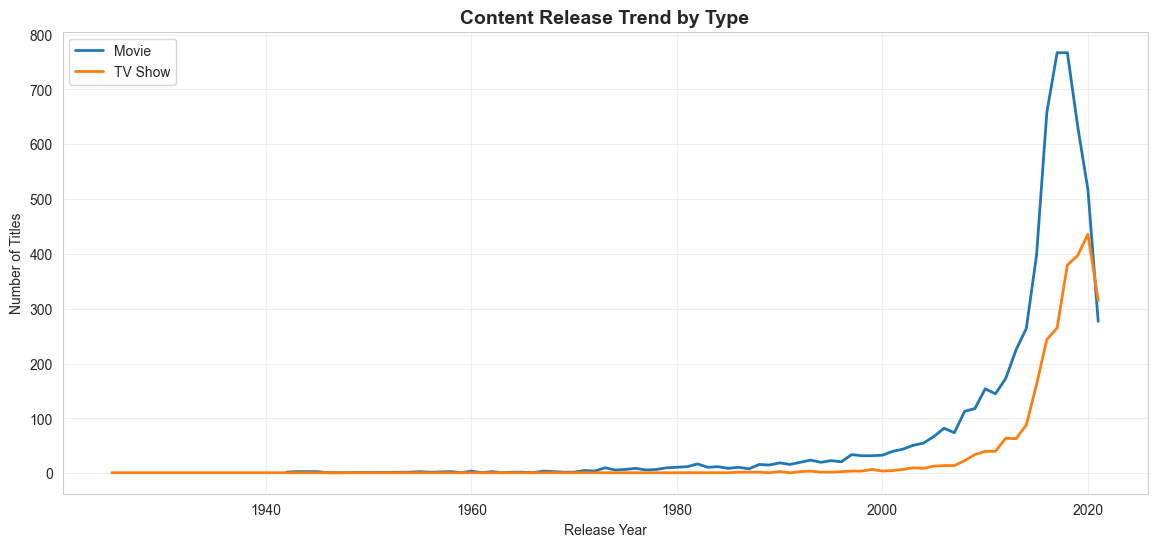

In [19]:
# Release year by content type
plt.figure(figsize=(14, 6))

for content_type in df['type'].unique():
    data = df[df['type'] == content_type]['release_year'].value_counts().sort_index()
    plt.plot(data.index, data.values, label=content_type, linewidth=2)

plt.title('Content Release Trend by Type', fontsize=14, fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 6. Rating Analysis

In [20]:
# Top ratings
rating_counts = df['rating'].value_counts()
print("Top 10 Ratings:")
print(rating_counts.head(10))

Top 10 Ratings:
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


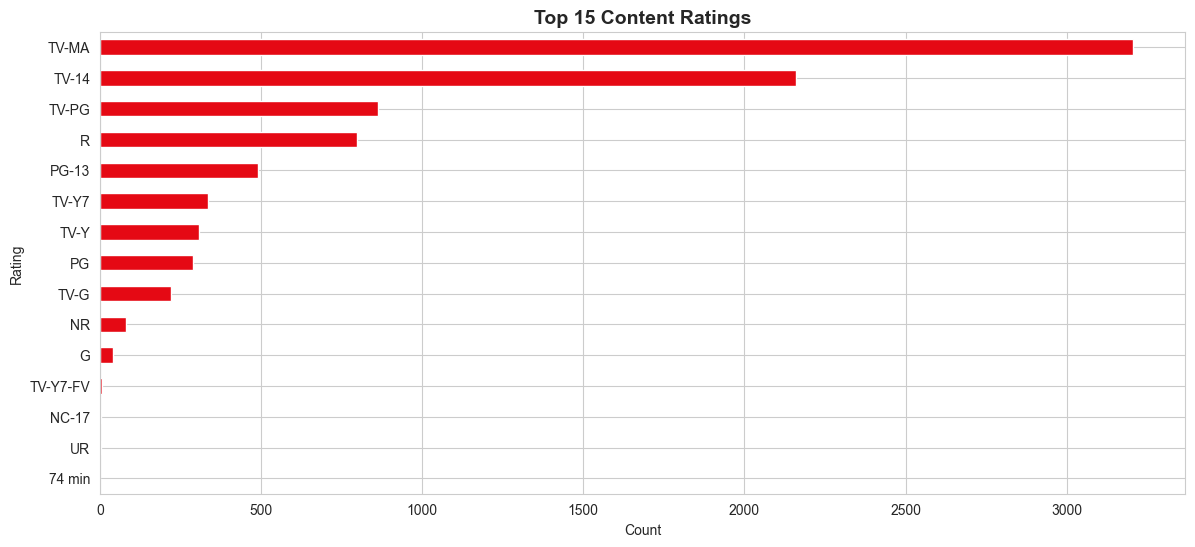

In [21]:
# Visualize ratings
plt.figure(figsize=(14, 6))
rating_counts.head(15).plot(kind='barh', color='#E50914')
plt.title('Top 15 Content Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.gca().invert_yaxis()
plt.show()

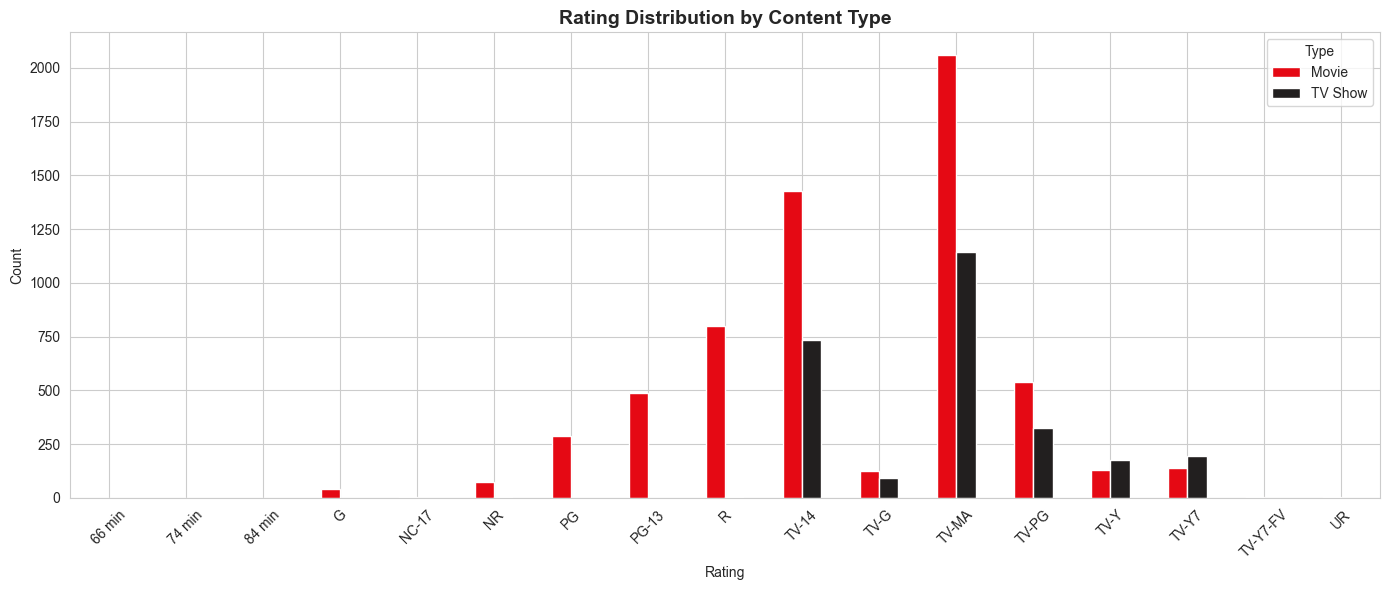

In [22]:
# Rating by content type
rating_type = pd.crosstab(df['rating'], df['type'])
rating_type.plot(kind='bar', figsize=(14, 6), color=['#E50914', '#221f1f'])
plt.title('Rating Distribution by Content Type', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

## 7. Country Analysis

In [23]:
# Top countries
# Split countries (some entries have multiple countries)
countries = df['country'].dropna().str.split(', ').explode()
top_countries = countries.value_counts().head(15)

print("Top 15 Countries:")
print(top_countries)

Top 15 Countries:
country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Name: count, dtype: int64


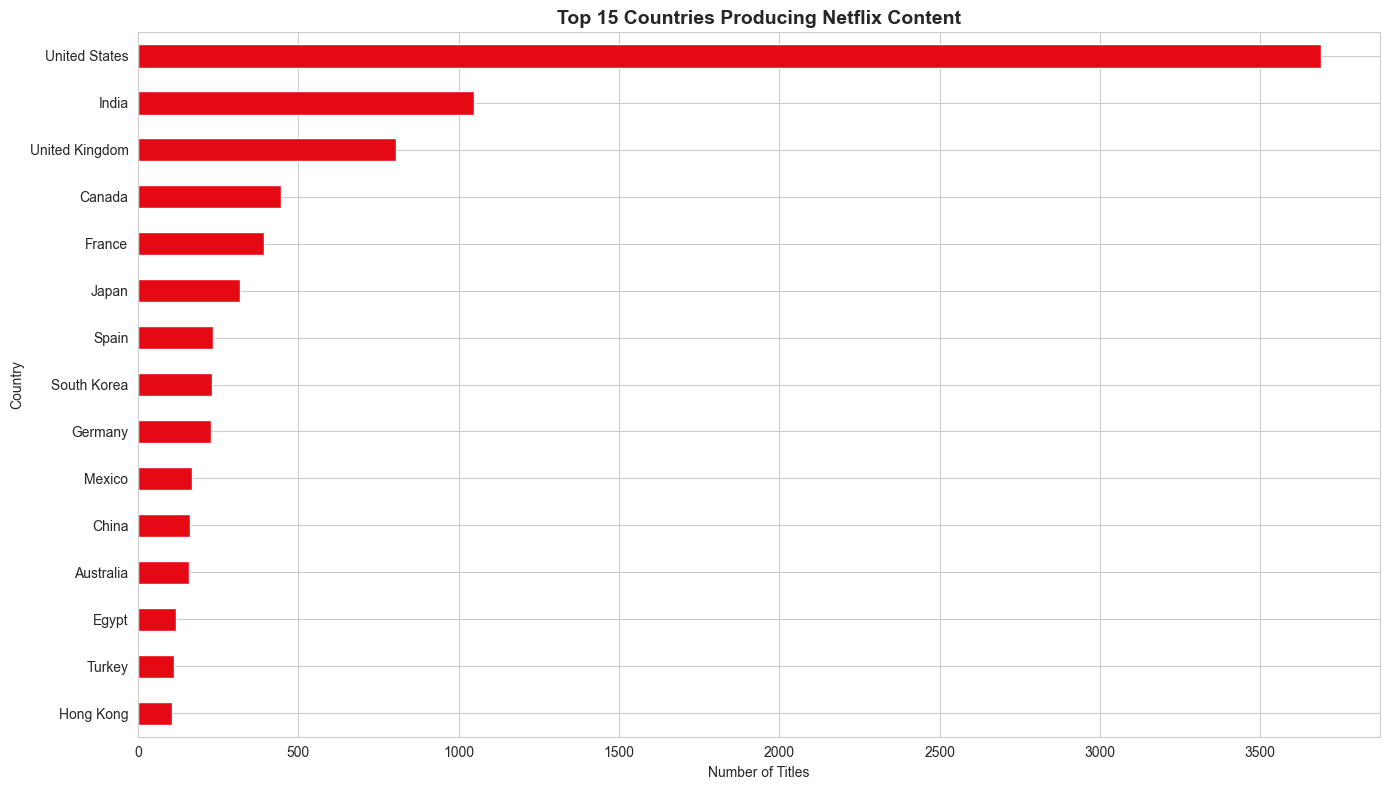

In [24]:
# Visualize top countries
plt.figure(figsize=(14, 8))
top_countries.plot(kind='barh', color='#E50914')
plt.title('Top 15 Countries Producing Netflix Content', fontsize=14, fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 8. Genre Analysis

In [25]:
# Top genres
genres = df['listed_in'].dropna().str.split(', ').explode()
top_genres = genres.value_counts().head(20)

print("Top 20 Genres:")
print(top_genres)

Top 20 Genres:
listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Music & Musicals             375
Romantic TV Shows            370
Horror Movies                357
Stand-Up Comedy              343
Reality TV                   255
Name: count, dtype: int64


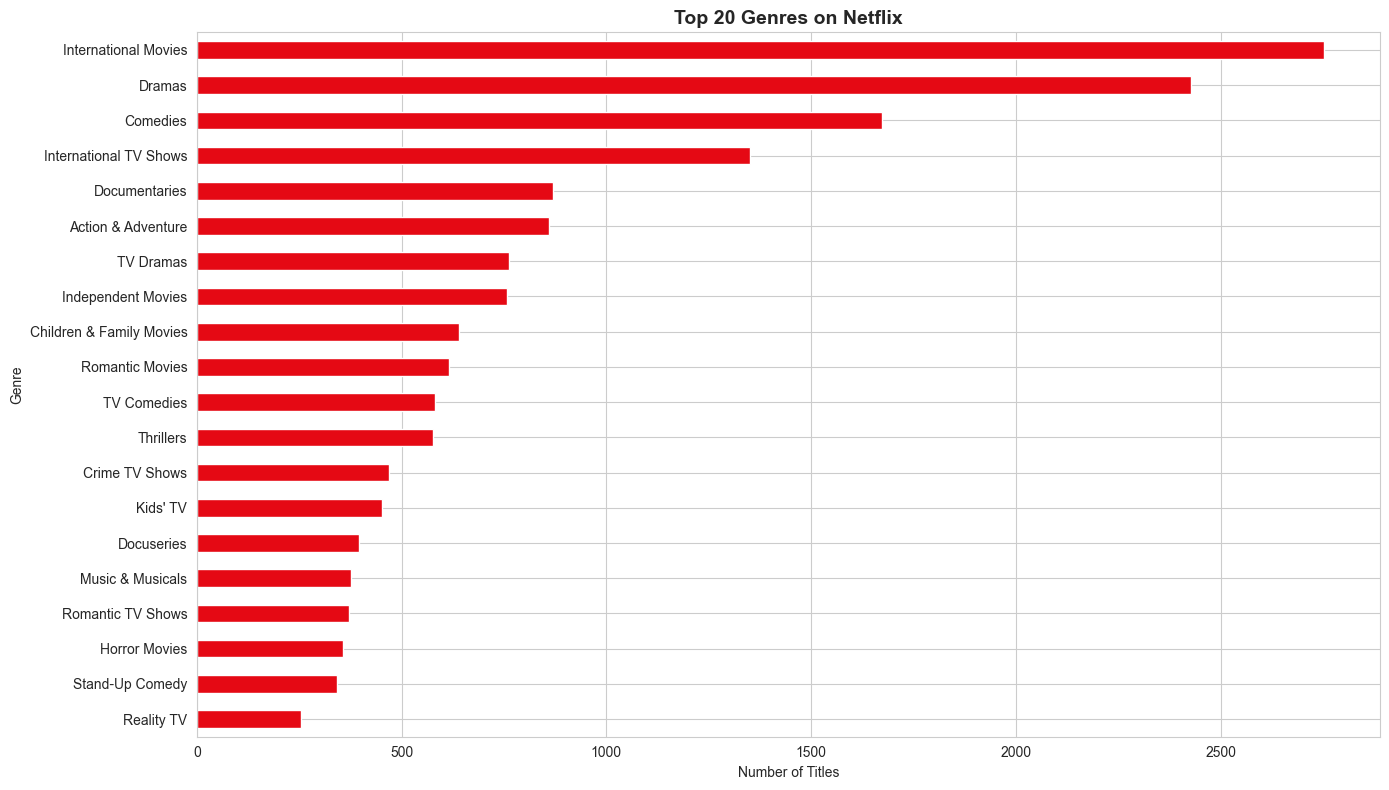

In [26]:
# Visualize top genres
plt.figure(figsize=(14, 8))
top_genres.plot(kind='barh', color='#E50914')
plt.title('Top 20 Genres on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 9. Duration Analysis

In [27]:
# Separate movies and TV shows for duration analysis
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

print(f"Total Movies: {len(movies)}")
print(f"Total TV Shows: {len(tv_shows)}")

Total Movies: 6131
Total TV Shows: 2676


Movie Duration Statistics:
count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_min, dtype: float64


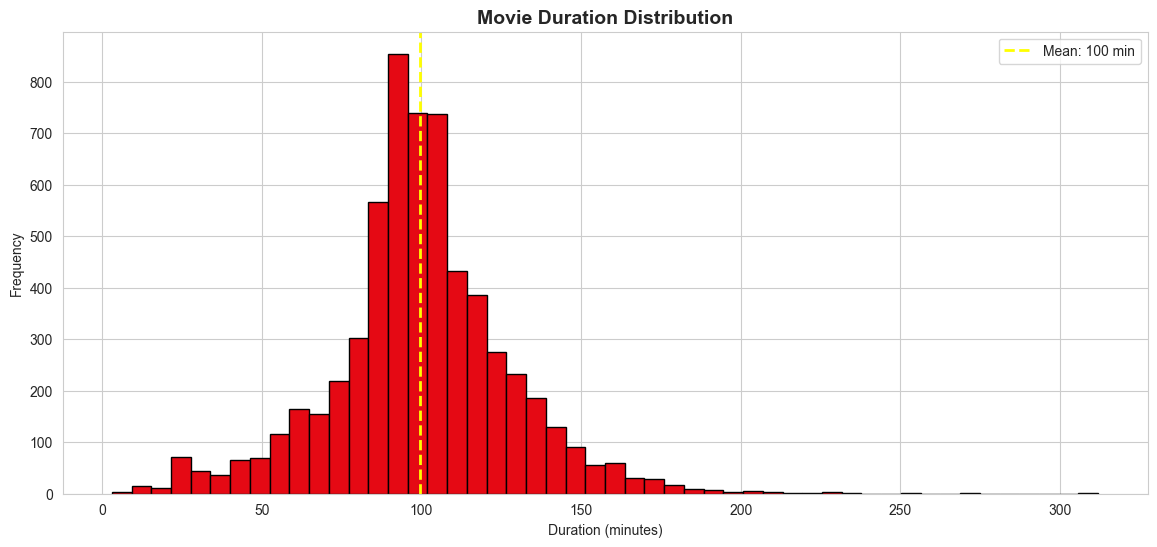

In [28]:
# Movie duration analysis
if len(movies) > 0:
    # Extract minutes from duration
    movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)
    
    print("Movie Duration Statistics:")
    print(movies['duration_min'].describe())
    
    # Visualize movie duration distribution
    plt.figure(figsize=(14, 6))
    plt.hist(movies['duration_min'].dropna(), bins=50, color='#E50914', edgecolor='black')
    plt.title('Movie Duration Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Duration (minutes)')
    plt.ylabel('Frequency')
    plt.axvline(movies['duration_min'].mean(), color='yellow', linestyle='--', 
                linewidth=2, label=f'Mean: {movies["duration_min"].mean():.0f} min')
    plt.legend()
    plt.show()


TV Show Seasons Distribution:
num_seasons
1.0     1793
2.0      425
3.0      199
4.0       95
5.0       65
6.0       33
7.0       23
8.0       17
9.0        9
10.0       7
Name: count, dtype: int64


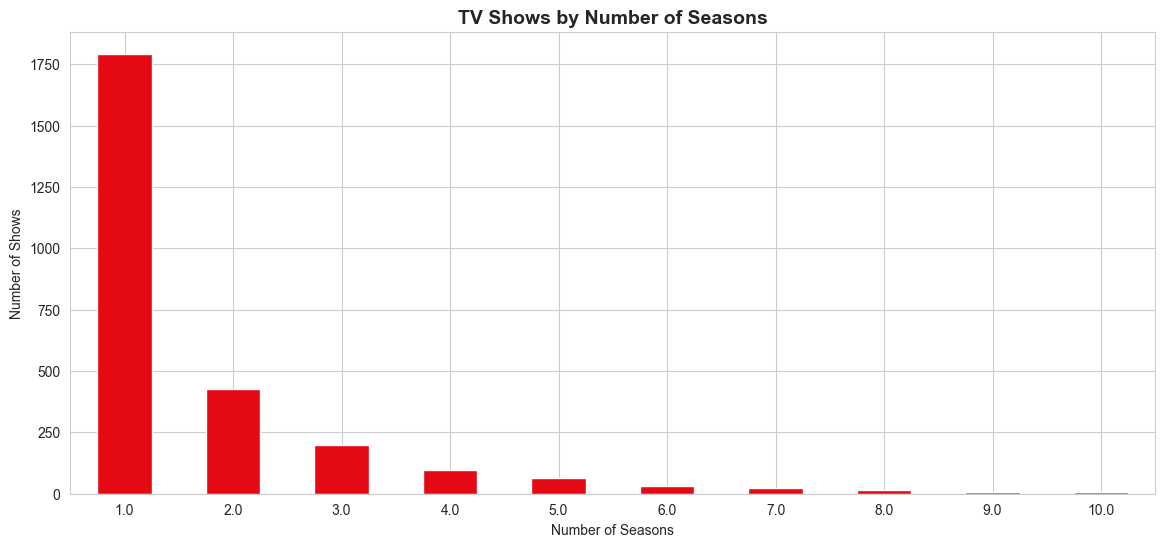

In [29]:
# TV show seasons analysis
if len(tv_shows) > 0:
    # Extract number of seasons
    tv_shows['num_seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)
    
    seasons_count = tv_shows['num_seasons'].value_counts().sort_index()
    
    print("\nTV Show Seasons Distribution:")
    print(seasons_count.head(10))
    
    # Visualize TV show seasons
    plt.figure(figsize=(14, 6))
    seasons_count.head(10).plot(kind='bar', color='#E50914')
    plt.title('TV Shows by Number of Seasons', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Seasons')
    plt.ylabel('Number of Shows')
    plt.xticks(rotation=0)
    plt.show()

## 10. Date Added Analysis

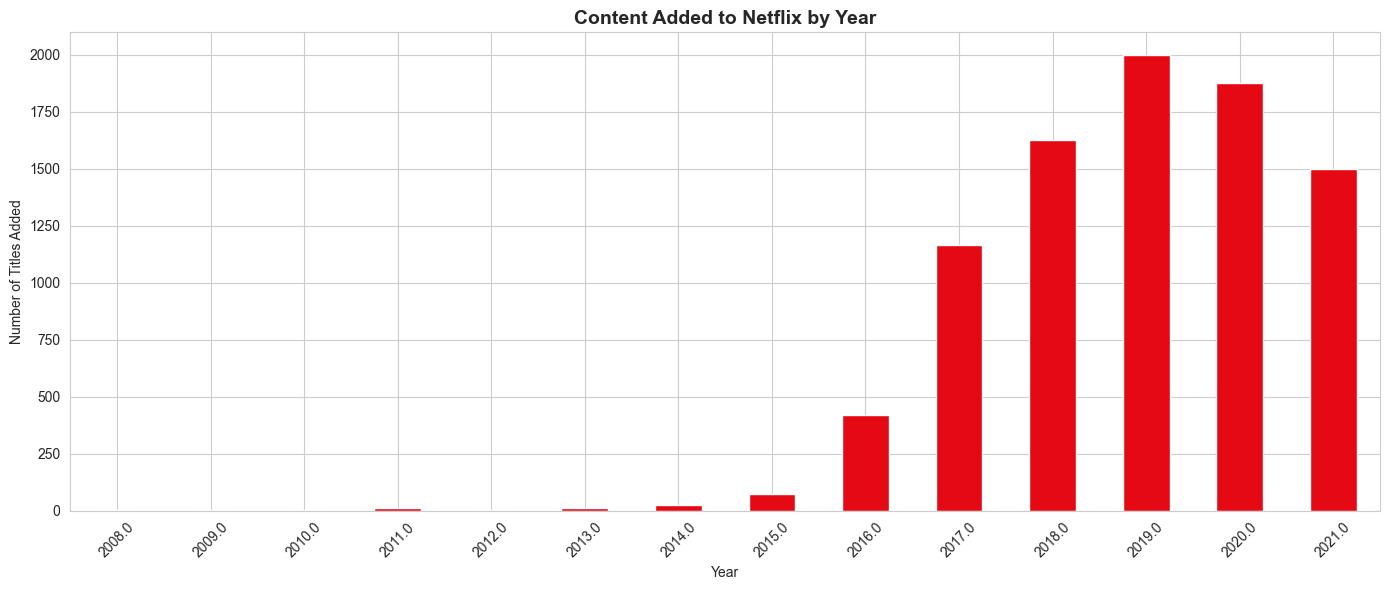

In [30]:
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Content added by year
yearly_additions = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
yearly_additions.plot(kind='bar', color='#E50914')
plt.title('Content Added to Netflix by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

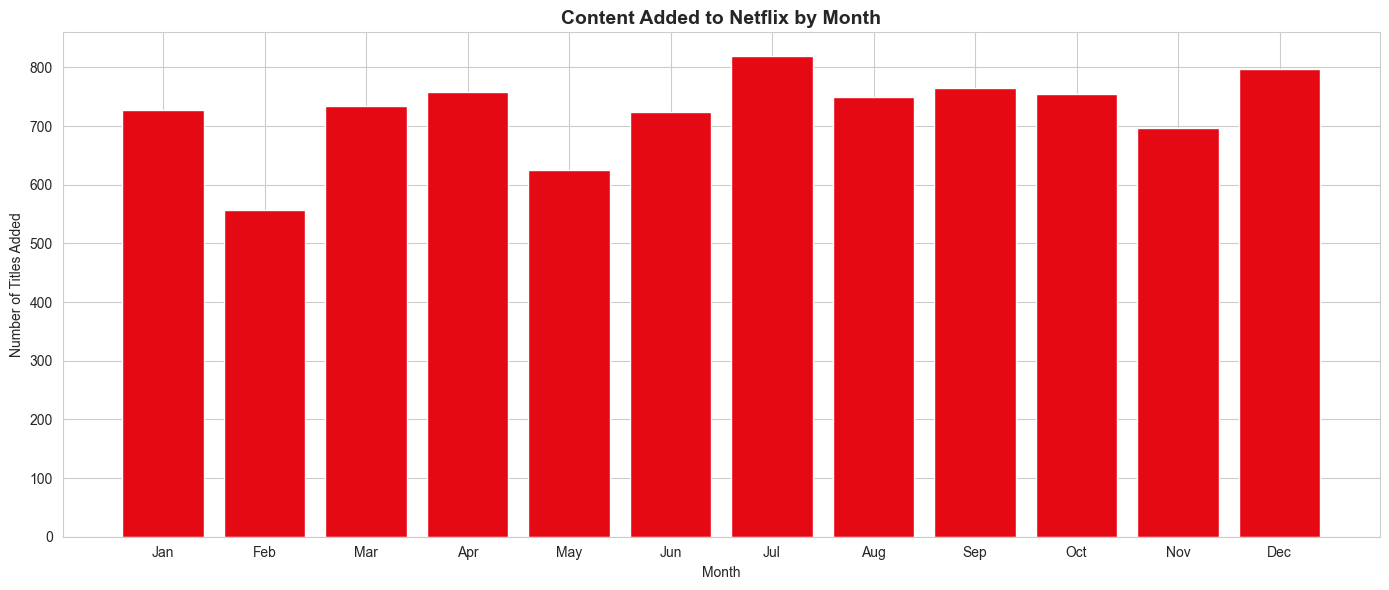

In [31]:
# Content added by month
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_additions = df['month_added'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
plt.bar(range(1, 13), [monthly_additions.get(i, 0) for i in range(1, 13)], color='#E50914')
plt.title('Content Added to Netflix by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(range(1, 13), month_names)
plt.tight_layout()
plt.show()

## 11. Director and Cast Analysis

In [32]:
# Top directors
directors = df['director'].dropna().str.split(', ').explode()
top_directors = directors.value_counts().head(15)

print("Top 15 Directors:")
print(top_directors)

Top 15 Directors:
director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Youssef Chahine        12
Martin Scorsese        12
Jay Chapman            12
Steven Spielberg       11
Don Michael Paul       10
David Dhawan            9
Yılmaz Erdoğan          9
Anurag Kashyap          9
Name: count, dtype: int64


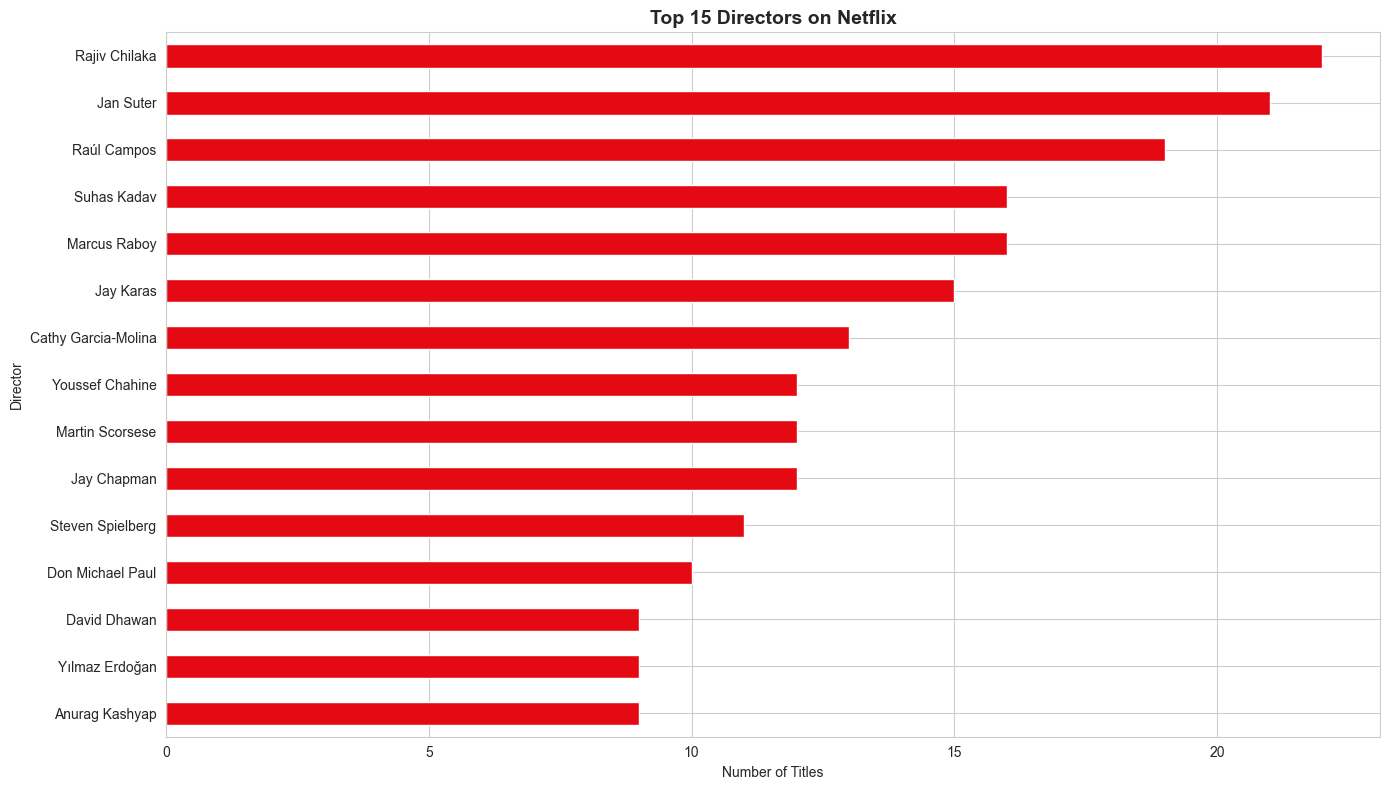

In [33]:
# Visualize top directors
plt.figure(figsize=(14, 8))
top_directors.plot(kind='barh', color='#E50914')
plt.title('Top 15 Directors on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [34]:
# Top cast members
cast = df['cast'].dropna().str.split(', ').explode()
top_cast = cast.value_counts().head(15)

print("\nTop 15 Cast Members:")
print(top_cast)


Top 15 Cast Members:
cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Amitabh Bachchan    28
Paresh Rawal        28
Boman Irani         27
Rajesh Kava         26
Vincent Tong        26
Andrea Libman       25
Name: count, dtype: int64


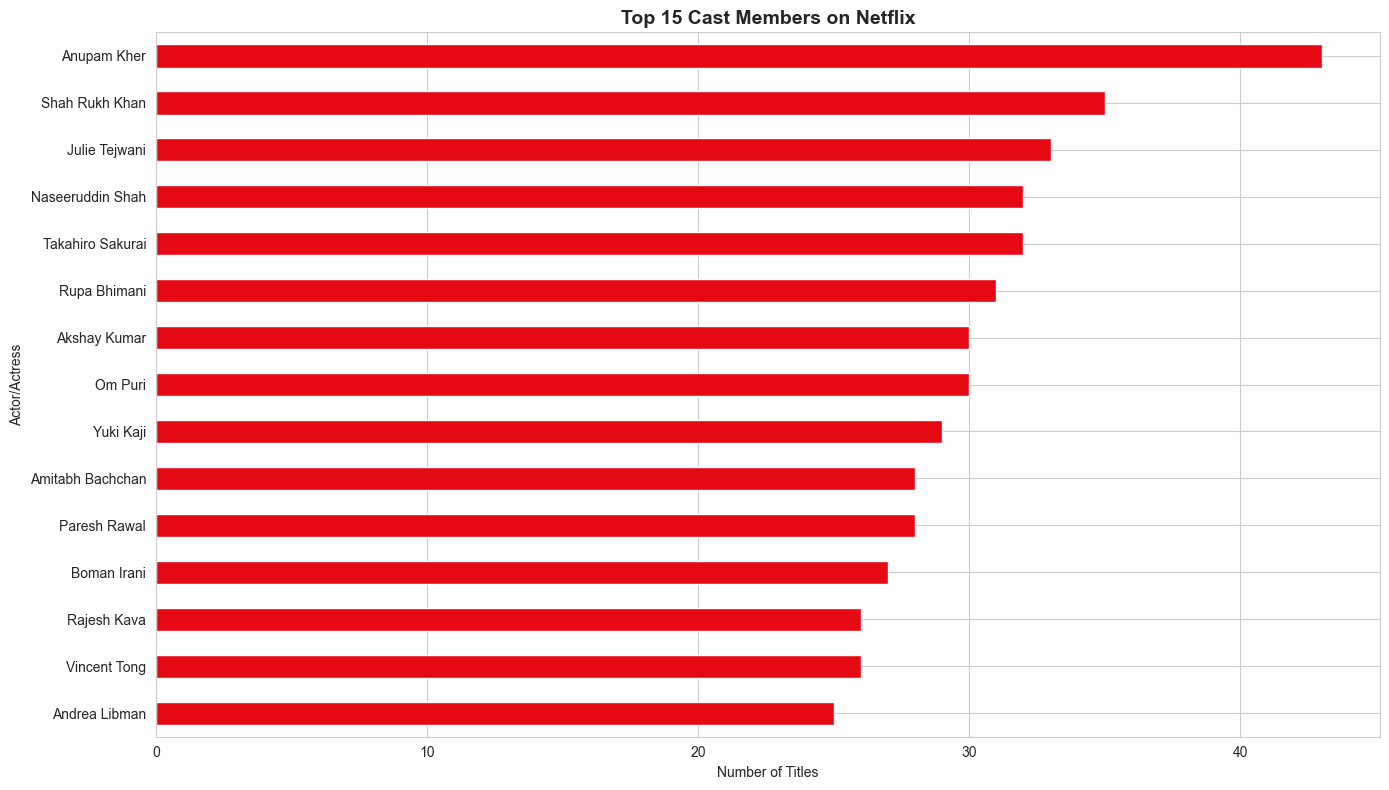

In [35]:
# Visualize top cast
plt.figure(figsize=(14, 8))
top_cast.plot(kind='barh', color='#E50914')
plt.title('Top 15 Cast Members on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Actor/Actress')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 12. Key Insights Summary

In [36]:
print("=" * 80)
print("NETFLIX DATASET KEY INSIGHTS")
print("=" * 80)

print(f"\n1. DATASET SIZE:")
print(f"   - Total titles: {len(df):,}")
print(f"   - Movies: {len(movies):,} ({len(movies)/len(df)*100:.1f}%)")
print(f"   - TV Shows: {len(tv_shows):,} ({len(tv_shows)/len(df)*100:.1f}%)")

print(f"\n2. CONTENT TIMELINE:")
print(f"   - Oldest release year: {df['release_year'].min()}")
print(f"   - Newest release year: {df['release_year'].max()}")
print(f"   - Most common release year: {df['release_year'].mode()[0]}")

print(f"\n3. TOP CONTENT RATING:")
print(f"   - Most common rating: {df['rating'].mode()[0]}")

print(f"\n4. TOP PRODUCING COUNTRY:")
print(f"   - {top_countries.index[0]}: {top_countries.iloc[0]:,} titles")

print(f"\n5. MOST POPULAR GENRE:")
print(f"   - {top_genres.index[0]}: {top_genres.iloc[0]:,} titles")

if len(movies) > 0 and 'duration_min' in movies.columns:
    print(f"\n6. MOVIE DURATION:")
    print(f"   - Average: {movies['duration_min'].mean():.0f} minutes")
    print(f"   - Median: {movies['duration_min'].median():.0f} minutes")

print("\n" + "=" * 80)

NETFLIX DATASET KEY INSIGHTS

1. DATASET SIZE:
   - Total titles: 8,807
   - Movies: 6,131 (69.6%)
   - TV Shows: 2,676 (30.4%)

2. CONTENT TIMELINE:
   - Oldest release year: 1925
   - Newest release year: 2021
   - Most common release year: 2018

3. TOP CONTENT RATING:
   - Most common rating: TV-MA

4. TOP PRODUCING COUNTRY:
   - United States: 3,689 titles

5. MOST POPULAR GENRE:
   - International Movies: 2,752 titles

6. MOVIE DURATION:
   - Average: 100 minutes
   - Median: 98 minutes



## 13. Export Cleaned Data (Optional)

In [37]:
# Uncomment to export cleaned data
# df.to_csv('netflix_titles_cleaned.csv', index=False)
# print("Cleaned data exported successfully!")